In [1]:
#importing necessary lIbrearies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv(r"D:\IT\Data Science\Python\Affitech Technologies\Python and Machine Learning Notes\Project Assignments\Combined Data Sets For practice\heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Statistical Analysis of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape

(303, 14)

In [7]:
#Checking Null Vallue
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

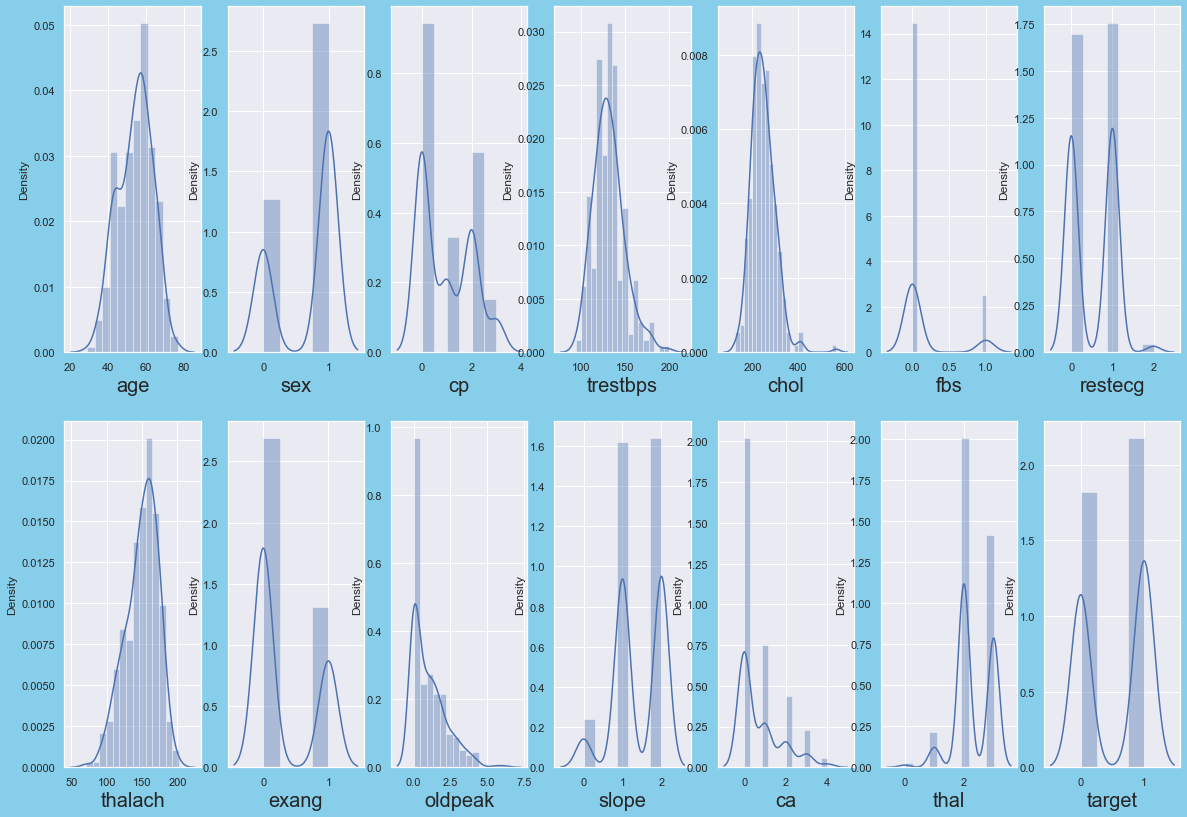

In [8]:
plt.figure(figsize = (20,14), facecolor = 'skyblue')
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show()    

<AxesSubplot:>

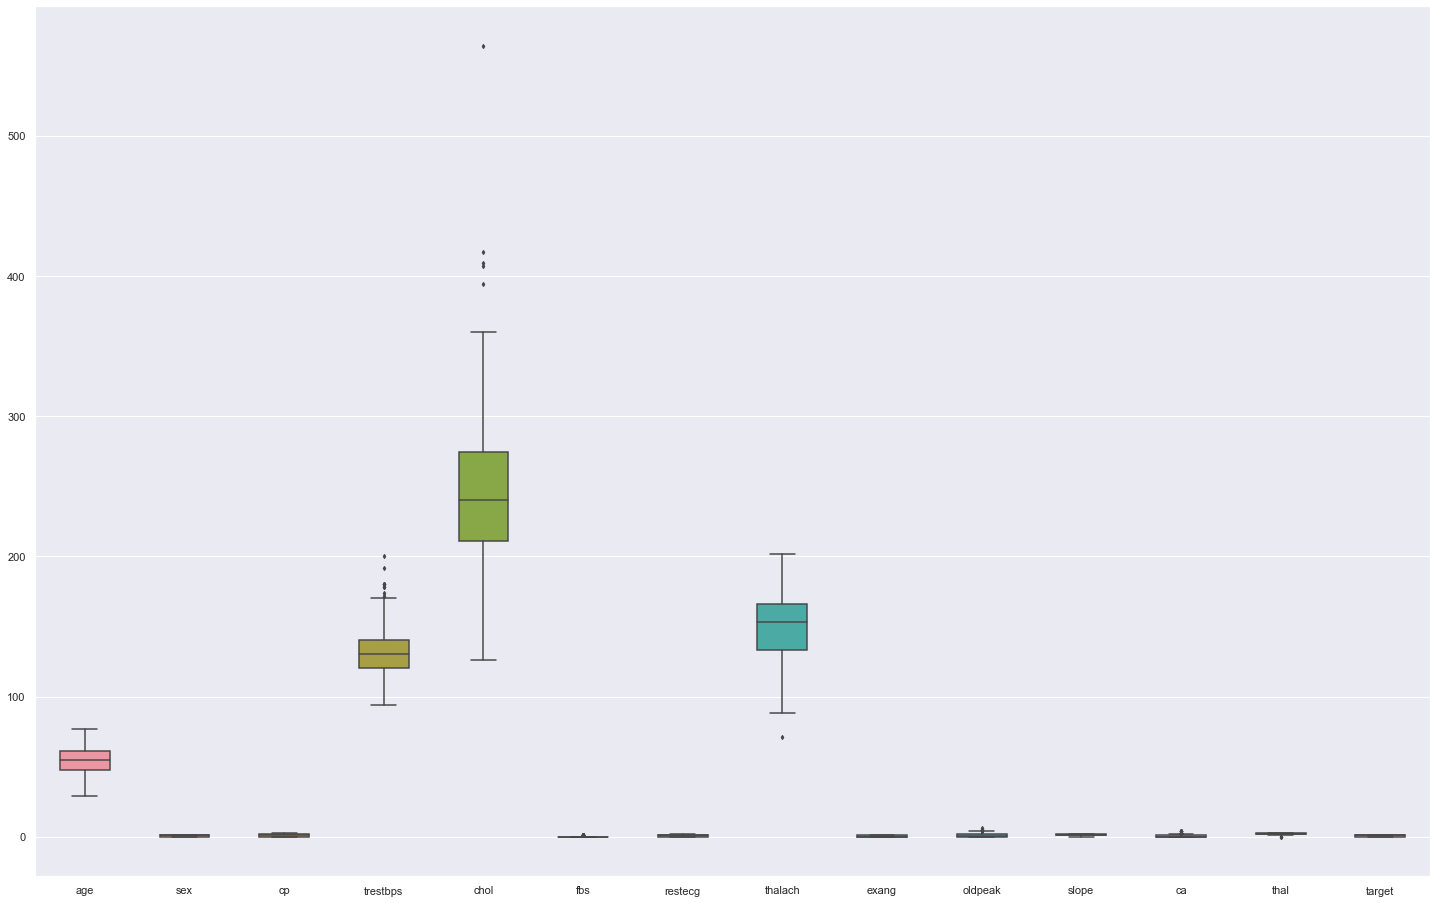

In [9]:
fig,ax = plt.subplots(figsize = (25,16))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)

<AxesSubplot:>

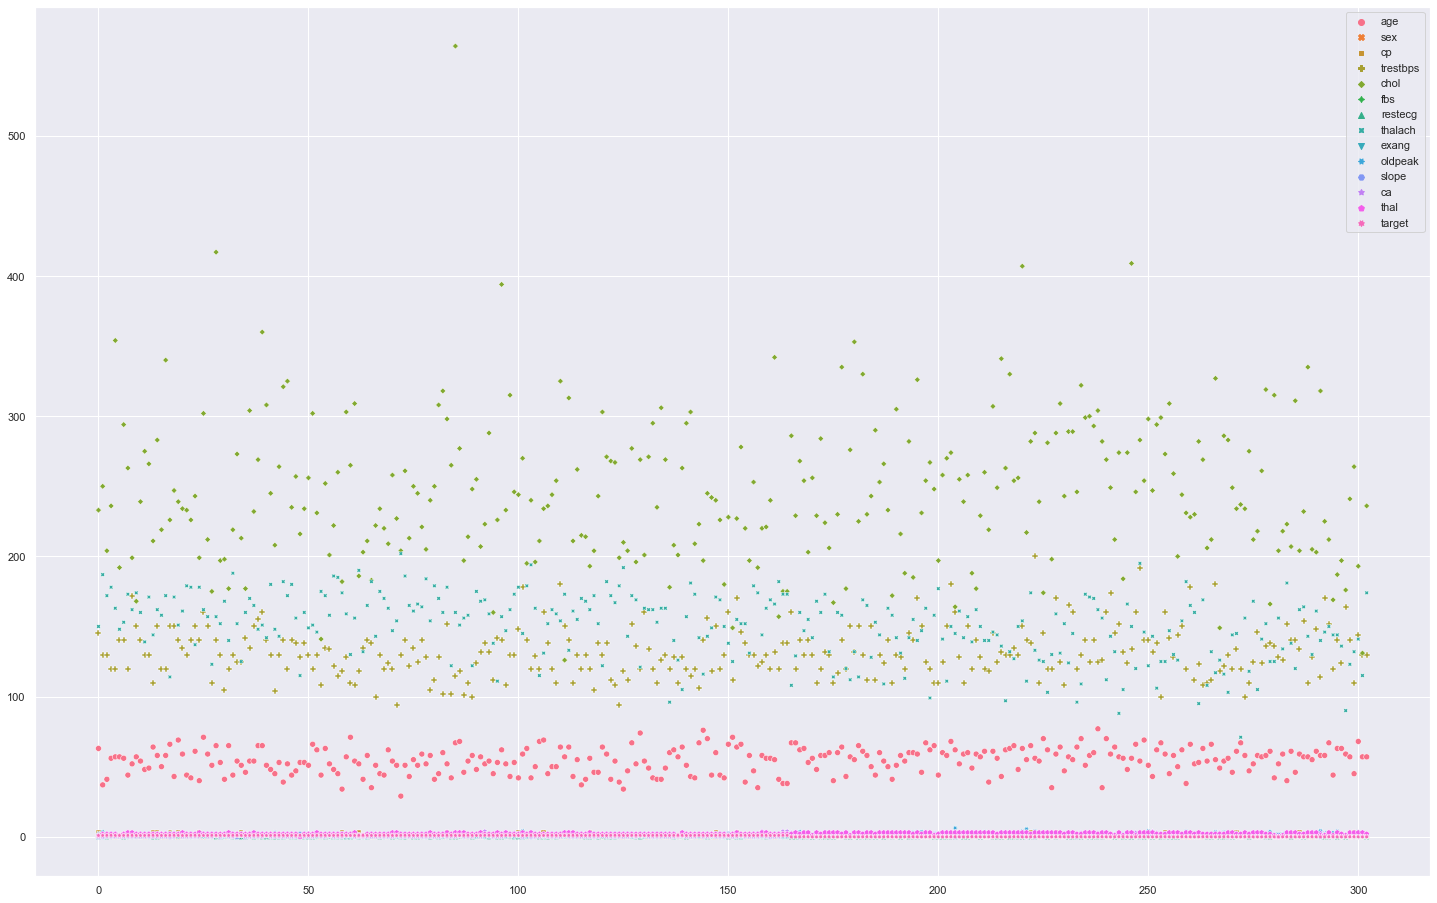

In [10]:
fig,ax = plt.subplots(figsize = (25,16))
sns.scatterplot(data = data)

In [11]:
q = data['trestbps'].quantile(0.95)
data_cleaned = data[data['trestbps'] < q]

q = data['chol'].quantile(0.93)
data_cleaned = data[data['chol'] < q]

q = data['thalach'].quantile(0.99)
data_cleaned = data[data['thalach'] < q]

<AxesSubplot:>

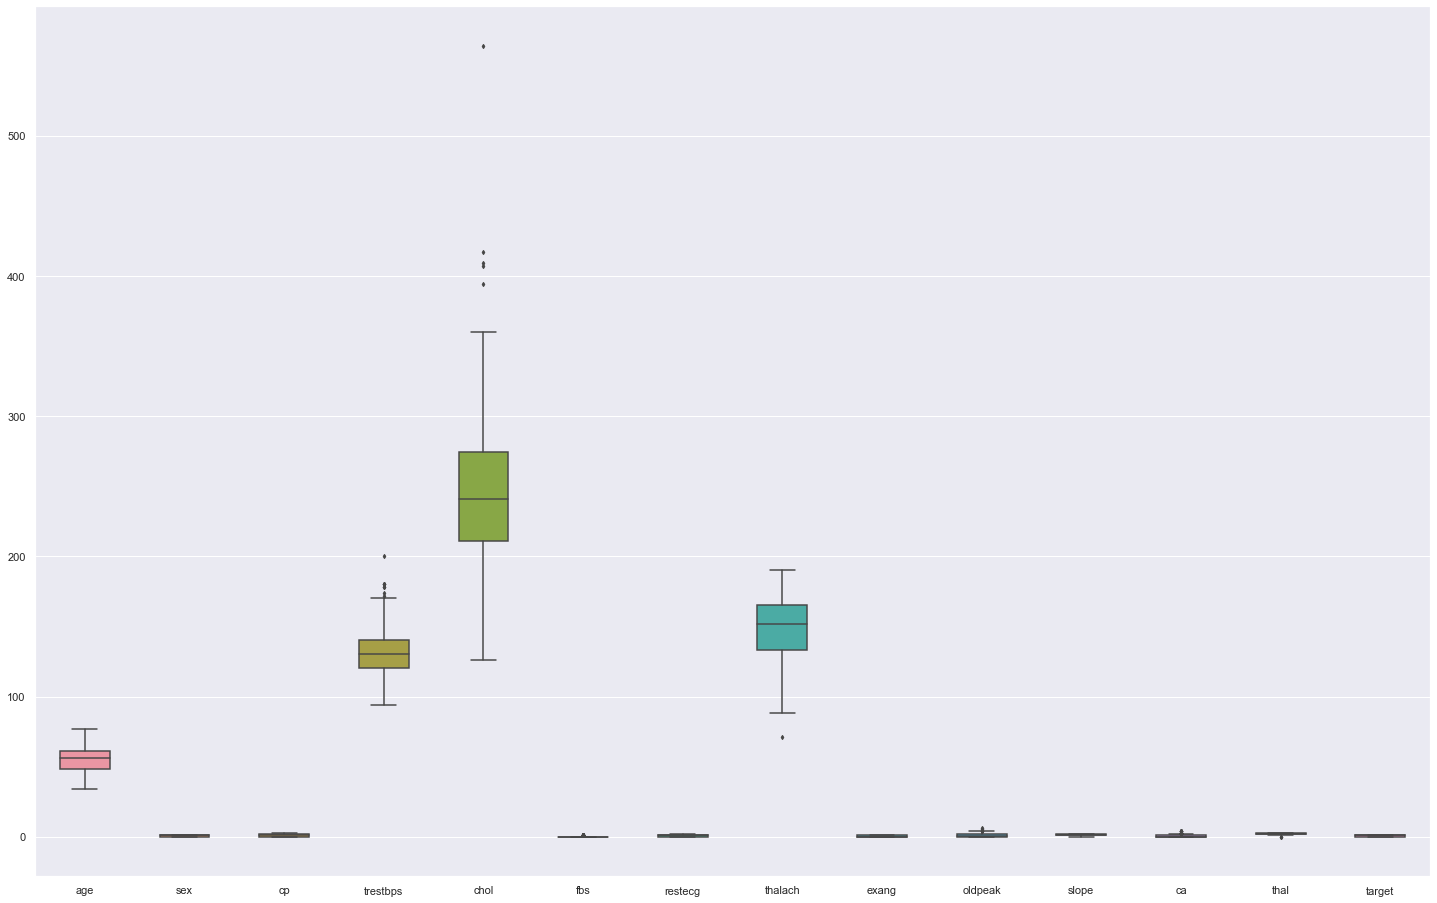

In [12]:
fig,ax = plt.subplots(figsize = (25,16))
sns.boxplot(data = data_cleaned, width = 0.5, ax = ax, fliersize = 3)

In [13]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [14]:
corr = data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


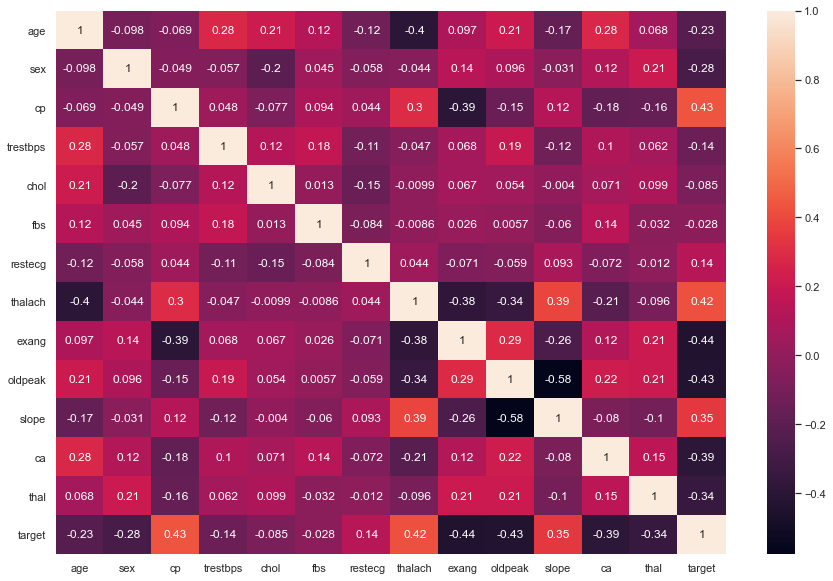

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(corr, xticklabels = 'auto', yticklabels = 'auto', annot = True)
plt.show()

In [16]:
X = data.drop(columns = ['target'], axis = 1)
y = data['target']

In [17]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [18]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.443474,age
1,1.161866,sex
2,1.284456,cp
3,1.170591,trestbps
4,1.150174,chol
5,1.087379,fbs
6,1.060998,restecg
7,1.613726,thalach
8,1.402001,exang
9,1.705857,oldpeak


In [19]:
from sklearn.decomposition import PCA

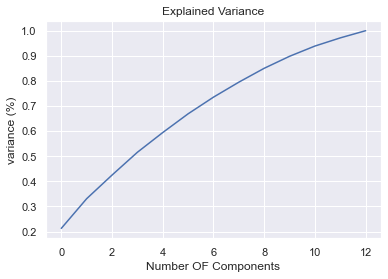

In [20]:
pca = PCA()
X_comp_scaled = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number OF Components')
plt.ylabel('variance (%)')
plt.title('Explained Variance')
plt.show()

In [21]:
X_comp_scaled

array([[ 0.62411073,  2.32127028,  2.47467255, ..., -0.55811461,
         0.40407485,  0.42022097],
       [-0.45598798, -0.95735098,  1.1395948 , ..., -0.4921327 ,
         0.23225951,  0.27427359],
       [-1.82880491,  0.04288477, -0.45222878, ...,  0.36372499,
         0.17797717, -1.10955334],
       ...,
       [ 2.45900545,  0.47826191,  2.20821632, ..., -1.46340968,
         0.91844747, -0.75068625],
       [ 1.76275536, -2.33681621,  0.45475258, ...,  0.376824  ,
        -0.07554132,  0.34956711],
       [-0.86005677,  1.06851556, -0.69007429, ...,  0.08023982,
         0.31320761,  1.17838479]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_comp_scaled, y, test_size = 0.30, random_state = 455)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score

In [28]:
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8351648351648352

In [33]:
score = f1_score(y_test, y_pred)
score

0.8571428571428571

In [35]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8282312925170068

In [37]:
from sklearn.svm import SVC

In [41]:
clf = SVC()

clf.fit(x_train, y_train)

SVC()

In [42]:
clf.score(x_test,y_test)

0.8351648351648352

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
dt_clf.score(x_test, y_test)

0.7362637362637363

In [46]:
from sklearn.ensemble import BaggingClassifier

In [47]:
bag_clf = BaggingClassifier()

bag_clf.fit(x_train, y_train)

BaggingClassifier()

In [48]:
bag_clf.score(x_test, y_test)

0.8131868131868132

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
knn.score(x_test, y_test)

0.8021978021978022

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rand_clf = RandomForestClassifier()

rand_clf.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
rand_clf.score(x_test, y_test)

0.8021978021978022

In [56]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.simplefilter("ignore")

In [57]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

[00:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
xgb.score(x_test, y_test)

0.7472527472527473

In [59]:
param_grid = {'C': [0.1,1,10,500,1000,5000], 'gamma': [1.0,0.5,0.1,0.01,0.001]}

In [60]:
score

0.8571428571428571

In [63]:
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5, n_jobs = -1)

In [64]:
grid_search.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 500, 1000, 5000],
                         'gamma': [1.0, 0.5, 0.1, 0.01, 0.001]})

In [65]:
grid_search.score(x_test, y_test)

0.8901098901098901